# Handin 6
Andreas Malthe Henriksen (202004107)

Consider the space of differentiable functions $f:[0, \pi]\to \mathbb{R}$ with a $L^2$-inner product

$$\langle f,g \rangle = \int_{0}^{\pi}f(x)g(x) \ dx$$

## (a)

**Show that the collection** 
$$sin(x),sin(2x),\cdots,sin((k-1)x)$$
**where $x\in [0,\pi]$, are orthagonal for the inner product.**

In [1]:
import numpy as np
n = 1000
x, h = np.linspace(0, np.pi, n, retstep=True)

To test for orthogonality I use the trapz function in numpy. To test the collection I created the following function.

In [2]:
def is_collection_orthagonal(k, mtol = 8):
    # Loop over every element in the cartesian product
    for i in range(k):
        for j in range(i+1, k): # We start at i+1 to skip testing reverse orderings of the same product
            # The sin-functions to test
            f = np.sin(i*x)
            g = np.sin(j*x)
            trapz = np.trapz(f * g, dx=h)
            if (np.abs(trapz) > np.finfo(float).eps * mtol):
                # If the test fails, print the pair that failed the test and return falsely.
                print(np.abs(np.trapz(f * g, dx=h))," Was greater at sin(", i , "* x) * sin(", j, "* x)")
                return False
    return True

We can run this function for $k=50$ to get

In [3]:
print("Is the collection orthagonal?: ",is_collection_orthagonal(50))

Is the collection orthagonal?:  True


## (b)
**Makes sense of why $f(x)=1$ is orthagonal to $sin(2x)$ and $sin(4x)$ but not on $sin(x)$ nor $sin(3x)$**

Lets plot a sin-function to look at. Let that be sin(5*x)

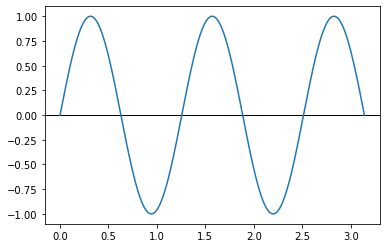

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.axhline(0, color='black', lw=1)
ax.plot(x, np.sin(5*x))

Consider how it has 5 tips.

It is all in the number of peaks and valleys the sin-functions have. If the inner-product is the integral of the sin functions, then it would make sense that the area underneath the function should be zero. In order for the sin functions to have no area underneath, the peaks and valleys must cancel eachother out.

For $sin(x),\ x\in[0,\pi]$ the area is $2$ which is directly proportional with the number of peaks, $1$ and valleys, $0$.

Therefore any number $k$ when multiplied $\int_0^\pi sin(kx)$ will be 0 if an even number, meaning equal number of peaks and valleys or will have an area $\frac{2}{k}$ if odd.

## (c)
**Project $f(x)=1$ along $sin(x)$ and $sin(3x)$. From the projection find the function $1+c_1sin(x)+c_3sin(3x)$, which is orthagonal to both sin(x) and sin(3x). Explain why this combination is orthagonal to all of the functions $sin(x), sin(2x),\cdots sin(5x)$**

In [5]:
def f_values(n):
    return np.ones(n)

In [6]:
def proj(v, u):
    return np.vdot(v, u) / np.vdot(v, v) * v

In [7]:
u0 = f_values(n)[:, np.newaxis]
u1 = np.sin(x)[:, np.newaxis]
u2 = np.sin(3*x)[:, np.newaxis]

v0 = u0
w1 = u1 - proj(v0, u1)
v1 = w1
w2 = u2 - proj(v0, u2) - proj(v1, u2)
v2 = w2
v = np.hstack([v0,v1,v2])
gram = v.T @ v
np.set_printoptions(suppress=True)
gram

array([[1000.        ,   -0.        ,   -0.        ],
       [  -0.        ,   95.02609628,    0.        ],
       [  -0.        ,    0.        ,  263.27009542]])

In [120]:
c1 = gram[2,2]
c3 = gram[2,2]
print(np.vdot(v2,v2))
def new_fun(x):
    return 1 + (c1 * np.sin(x)) + (c3 * np.sin(3*x))

263.270095421011


In [121]:
sin1 = np.sin(x)
sin2 = np.sin(2*x)
sin3 = np.sin(3*x)
sin4 = np.sin(4*x)
new = new_fun(x)

print(np.trapz(new * sin4, dx=h))

0.0


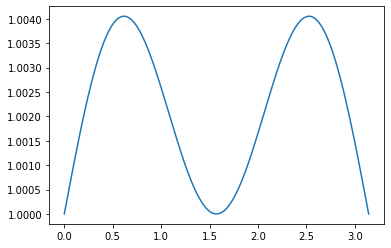

In [119]:
fig, ax = plt.subplots()
ax.plot(x, new)